In [0]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D,UpSampling2D,Input, Flatten,\
                                    Reshape, LeakyReLU as LR,\
                                    Activation, Dropout
from tensorflow.keras.models import Model, Sequential
from matplotlib import pyplot as plt
import numpy as np

import os
import random
import pickle
import matplotlib.pyplot as plt
import cv2
from tensorflow.keras.preprocessing.image import ImageDataGenerator


print(os.listdir("/content/gdrive/My Drive/covid-chestxray-dataset-master/covid-chestxray-dataset-master/data"))

['covid', 'non_covid']


In [0]:
IMG_SIZE = 128

In [0]:
CATEGORIES = ['covid', 'non_covid']
dataset = []

def generate_data():
    for category in CATEGORIES:
        path = f'/content/gdrive/My Drive/covid-chestxray-dataset-master/covid-chestxray-dataset-master/data/{category}'
        class_id = CATEGORIES.index(category)
        for image in os.listdir(path):
            try:
                image_array = cv2.imread(os.path.join(path, image), cv2.IMREAD_COLOR)
                image_array = cv2.resize(image_array, (IMG_SIZE,IMG_SIZE))
                dataset.append([image_array, class_id])
            except Exception as e:
                print(e)
    random.shuffle(dataset)
                
generate_data()

In [0]:
print(len(dataset))

162


In [0]:
data = []
labels = []
for features, label in dataset:
    data.append(features)
    labels.append(label)

In [0]:
import tensorflow as tf
data = np.array(data)
data.reshape(-1,128,3)

In [0]:
from sklearn.model_selection import train_test_split
data = data/255
train_x,data,train_y,labels =train_test_split(data,labels,test_size=0.5)
test_data, validation_data, test_labels, validation_labels = train_test_split(data, 
                                                                    labels,
                                                                   test_size=0.5)

In [0]:
#train_x = train_x/ 255
#train_x.resize(142,128,128,3)
#train_x.shape
#data.shape
#data.shape
#validation_data.shape
print(len(train_x))
print(len())

(81, 128, 128, 3)

In [0]:
input_layer=Input(shape= (128,128,3))

In [0]:
#encoder part
encode_layer1 = Dense(1500, activation= 'relu')(input_layer)
encode_layer2 = Dense(1000, activation= 'relu')(encode_layer1)
encode_layer3 = Dense(500, activation= 'relu')(encode_layer2)
output_1 = Dense(3)(encode_layer3)
model1= Model(input_layer,output_1)
model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 128, 128, 3)]     0         
_________________________________________________________________
dense (Dense)                (None, 128, 128, 1500)    6000      
_________________________________________________________________
dense_1 (Dense)              (None, 128, 128, 1000)    1501000   
_________________________________________________________________
dense_2 (Dense)              (None, 128, 128, 500)     500500    
_________________________________________________________________
dense_3 (Dense)              (None, 128, 128, 3)       1503      
Total params: 2,009,003
Trainable params: 2,009,003
Non-trainable params: 0
_________________________________________________________________


In [0]:
model2 = Sequential([
      
       Dense(3, activation = 'relu', input_shape=(IMG_SIZE,IMG_SIZE,3)) ,
       Dense(16,activation='relu'),
       Dropout(0.2),
       Dense(32, activation='relu'),
       Dense(32, activation='sigmoid'),
       Dropout(0.5),
       Dense(3, activation='softmax')
])


In [0]:

model2.compile(optimizer='ADAM', loss='binary_crossentropy')
model2.add(BatchNormalization())

In [0]:
model2.summary()
print(output_1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 128, 128, 3)       12        
_________________________________________________________________
dense_5 (Dense)              (None, 128, 128, 16)      64        
_________________________________________________________________
dropout (Dropout)            (None, 128, 128, 16)      0         
_________________________________________________________________
dense_6 (Dense)              (None, 128, 128, 32)      544       
_________________________________________________________________
dense_7 (Dense)              (None, 128, 128, 32)      1056      
_________________________________________________________________
dropout_1 (Dropout)          (None, 128, 128, 32)      0         
_________________________________________________________________
dense_8 (Dense)              (None, 128, 128, 3)       9

In [0]:
from tensorflow.keras.layers import *
print(output_1.shape)
print(model2.output.shape)
merged = concatenate([output_1,model2.output])

(None, 128, 128, 3)
(None, 128, 128, 3)


In [0]:
merged = Flatten()(merged)    
#merged = Dense(256, activation='relu')(merged)
#merged = Dropout(.5)(merged)
merged = Dense(128, activation='relu')(merged)
#merged = Dropout(.35)(merged)

# output layer
merged = Dense(5, activation='softmax')(merged)

In [0]:
output = Dense(2, activation='softmax')(merged)


In [0]:
newModel = Model([model1.input,model2.input],output)


In [0]:

newModel.compile(metrics=['accuracy'], loss='mse',optimizer ='adam')
#newModel.compile(optimizer='adam', loss='mse',metrics=['accuracy'])


newModel.summary()
#early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=5,verbose=1, mode='auto')
#history1 = newModel.fit([train_x,data],train_y,batch_size=batch_size,epochs=epochs,verbose=1)

In [0]:
batch_size = 16
epochs =30
#early_stopping = EarlyStopping(monitor='val_loss',min_delta=0,patience=5,verbose=1, mode='auto')
history1 = newModel.fit([train_x,data],y=np.array(train_y),batch_size=batch_size,epochs=epochs,verbose=1,validation_split=0.1)
#history1 = newModel.fit([train_x,data],train_y, batch_size=batch_size,epochs=epochs,validation_split=0.1)

Epoch 1/30
5/5 [==============================] - 2s 465ms/step - loss: 0.2515 - accuracy: 0.4306 - val_loss: 0.2500 - val_accuracy: 1.0000
Epoch 2/30
5/5 [==============================] - 2s 407ms/step - loss: 0.2500 - accuracy: 0.8472 - val_loss: 0.2500 - val_accuracy: 1.0000
Epoch 3/30
5/5 [==============================] - 2s 408ms/step - loss: 0.2500 - accuracy: 0.8472 - val_loss: 0.2500 - val_accuracy: 1.0000
Epoch 4/30
5/5 [==============================] - 2s 409ms/step - loss: 0.2500 - accuracy: 0.8472 - val_loss: 0.2500 - val_accuracy: 1.0000
Epoch 5/30
5/5 [==============================] - 2s 407ms/step - loss: 0.2500 - accuracy: 0.8472 - val_loss: 0.2500 - val_accuracy: 1.0000
Epoch 6/30
5/5 [==============================] - 2s 409ms/step - loss: 0.2500 - accuracy: 0.5972 - val_loss: 0.2500 - val_accuracy: 0.0000e+00
Epoch 7/30
5/5 [==============================] - 3s 520ms/step - loss: 0.2500 - accuracy: 0.1528 - val_loss: 0.2500 - val_accuracy: 0.0000e+00
Epoch 8/30
5

In [0]:
accuracy = history1.history['accuracy']
loss = history1.history['loss']
val_accuracy = history1.history['val_accuracy']
val_loss = history1.history['val_loss']

print(f'Training Accuracy: {np.max(accuracy)}')
print(f'Training Loss: {np.min(loss)}')
print(f'Validation Accuracy: {np.max(val_accuracy)}')
print(f'Validation Loss: {np.min(val_loss)}')

Training Accuracy: 0.8472222089767456
Training Loss: 0.25
Validation Accuracy: 1.0
Validation Loss: 0.2499999701976776


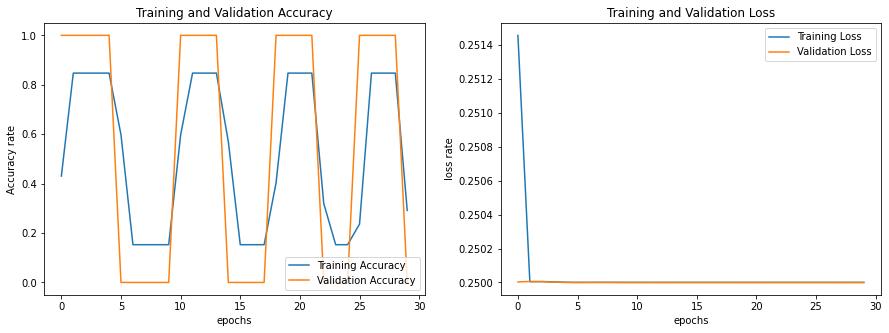

In [0]:
epochs_range = range(epochs)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.xlabel('epochs')
plt.ylabel('Accuracy rate')
plt.plot(epochs_range, accuracy, label="Training Accuracy")
plt.plot(epochs_range, val_accuracy, label="Validation Accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")

plt.subplot(1, 2, 2)
plt.xlabel('epochs')
plt.ylabel('loss rate')
plt.plot(epochs_range, loss, label="Training Loss")
plt.plot(epochs_range, val_loss, label="Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validation Loss")
plt.show()

In [0]:
class_names = ['cancer', 'normal']
def plot_images(i, predictions_array, true_labels, images):
    predictions_array, true_label, img = predictions_array[i], true_labels[i],images[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    
    plt.imshow(img)
    
    predicted_label = np.argmax(predictions_array)
        
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                        100*np.max(predictions_array),
                                        class_names[true_label]))

In [0]:
yPred = newModel.predict([test_data,test_data]).argmax( axis=-1 ) 


In [0]:
print(len(yPred))
#pred.resize(10,1)
print ( yPred )

40
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1]


In [0]:
from sklearn.metrics import precision_score
print("Precision Score : ",precision_score(test_labels, yPred,
                                           average='micro'))

Precision Score :  0.1


In [0]:
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix

print('F1_score : ',f1_score(test_labels,yPred))
print('sensitibity : ',metrics.recall_score(test_labels, yPred))

F1_score :  0.18181818181818182
sensitibity :  1.0


In [0]:
def plot_roc_curve(fpr,tpr): 
  plt.plot(fpr,tpr) 
  plt.axis([0,1,0,1]) 
  plt.xlabel('False Positive Rate') 
  plt.ylabel('True Positive Rate') 
  plt.show() 

In [0]:
from sklearn.metrics import classification_report
print(classification_report(test_labels, yPred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.10      1.00      0.18         4

    accuracy                           0.10        40
   macro avg       0.05      0.50      0.09        40
weighted avg       0.01      0.10      0.02        40



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


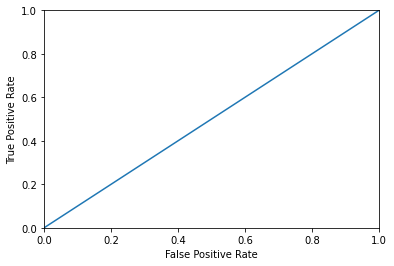

0.5
0.0


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:900: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(cov_ytyt * cov_ypyp)


In [0]:
from sklearn.metrics import roc_curve,roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef

fpr , tpr , thresholds = roc_curve (test_labels,yPred)
plot_roc_curve (fpr,tpr)
auc_score=roc_auc_score(test_labels,yPred) 
print(auc_score) 
print(matthews_corrcoef(test_labels,yPred))